# Step 2 Data Wrangling


Data wrangling is the second step in the Data Science Method. This step consists of multiple components including Data Collection, Data Organization, Data Definitions, and Data Cleaning.

## Data Collection

First, you'll load the needed packages and modules into Python. Then you'll load the data into a pandas dataframe for ease of use. Run the cell below to get started.

In [1]:
#loading python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**<font color='teal'> Print the current working directory </font>**

In [2]:
os.getcwd()

'C:\\Users\\13134\\Documents\\GitHub\\Capstone-1\\Capstone Project 1'

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 52EB-87F5

 Directory of C:\Users\13134\Documents\GitHub\Capstone-1\Capstone Project 1

06/02/2020  03:39 PM    <DIR>          .
06/02/2020  03:39 PM    <DIR>          ..
06/02/2020  10:13 AM    <DIR>          .ipynb_checkpoints
06/02/2020  03:39 PM            36,719 Capstone Project 1.ipynb
               1 File(s)         36,719 bytes
               3 Dir(s)  869,031,927,808 bytes free


### Load the data from the csv file
filename is `updated_ski_data.csv`

In [4]:
filename = r'F:\Data Analysis\Springboard\Data Science Career Track\Projects\Capstone 1\updated_ski_data.csv'
df = pd.read_csv(filename)
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Data Organization

### Creating subfolders in my your project directory

In [5]:
os.mkdir('data')

In [6]:
os.mkdir('figures')

In [7]:
os.mkdir('models')

<font color='teal'> **Checking if the additional folders have been created in the project directory.**</font>

In [8]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 52EB-87F5

 Directory of C:\Users\13134\Documents\GitHub\Capstone-1\Capstone Project 1

06/02/2020  03:41 PM    <DIR>          .
06/02/2020  03:41 PM    <DIR>          ..
06/02/2020  10:13 AM    <DIR>          .ipynb_checkpoints
06/02/2020  03:41 PM            45,387 Capstone Project 1.ipynb
06/02/2020  03:41 PM    <DIR>          data
06/02/2020  03:41 PM    <DIR>          figures
06/02/2020  03:41 PM    <DIR>          models
               1 File(s)         45,387 bytes
               6 Dir(s)  869,030,854,656 bytes free


## Data Definition
Reviewing column names, data types, and null values.

### Column Names 

In [9]:
df.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

### Data Types 
Reviewing which columns are integer, float, categorical, or dates.

In [10]:
df.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

<font color='teal'> **The `df.info()` function prints the count of non-null values per column.**</font>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [12]:
df.shape

(330, 27)

### Count of unique values or codes

In [13]:
df.nunique()

Name                 329
Region                38
state                 35
summit_elev          266
vertical_drop        193
base_elev            244
trams                  5
fastEight              2
fastSixes              7
fastQuads             14
quad                   7
triple                 9
double                10
surface               12
total_chairs          31
Runs                 110
TerrainParks          11
LongestRun_mi         42
SkiableTerrain_ac    193
Snow Making_ac       143
daysOpenLastYear     111
yearsOpen             72
averageSnowfall      107
AdultWeekday          83
AdultWeekend          81
projectedDaysOpen     90
NightSkiing_ac        78
dtype: int64

<font color='teal'> **Printing the percent of unique values per column using the `df.nunique` and the size of the dataframe to calculate the percentages.**</font>

In [14]:
df.nunique() / len(df)
#df.nunique()/df.shape[0]

Name                 0.996970
Region               0.115152
state                0.106061
summit_elev          0.806061
vertical_drop        0.584848
base_elev            0.739394
trams                0.015152
fastEight            0.006061
fastSixes            0.021212
fastQuads            0.042424
quad                 0.021212
triple               0.027273
double               0.030303
surface              0.036364
total_chairs         0.093939
Runs                 0.333333
TerrainParks         0.033333
LongestRun_mi        0.127273
SkiableTerrain_ac    0.584848
Snow Making_ac       0.433333
daysOpenLastYear     0.336364
yearsOpen            0.218182
averageSnowfall      0.324242
AdultWeekday         0.251515
AdultWeekend         0.245455
projectedDaysOpen    0.272727
NightSkiing_ac       0.236364
dtype: float64

For categorical columns it is much more helpful to know what the unique codes are.

In [15]:
#Value Count
df['Region'].value_counts()

New York               33
Michigan               29
Colorado               22
Sierra Nevada          22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Oregon                  6
Salt Lake City          6
North Carolina          6
Ohio                    5
Connecticut             5
Virginia                4
Mt. Hood                4
West Virginia           4
Illinois                4
Alaska                  3
Iowa                    3
Arizona                 2
Missouri                2
Nevada                  2
South Dakota            2
Indiana                 2
New Jersey              2
Tennessee               1
Maryland                1
Rhode Island            1
Northern California     1
Name: Region

In [16]:
df['state'].value_counts()

New York          33
Michigan          29
Colorado          22
California        21
Pennsylvania      19
New Hampshire     16
Wisconsin         16
Vermont           15
Minnesota         14
Utah              13
Montana           12
Idaho             12
Massachusetts     11
Washington        10
Oregon            10
New Mexico         9
Maine              9
Wyoming            8
North Carolina     6
Connecticut        5
Ohio               5
Virginia           4
Illinois           4
West Virginia      4
Nevada             4
Iowa               3
Alaska             3
New Jersey         2
Indiana            2
Arizona            2
Missouri           2
South Dakota       2
Rhode Island       1
Maryland           1
Tennessee          1
Name: state, dtype: int64

### Range of values per column

In [17]:
df.agg([min, max]).T

,min,max
Name,49 Degrees North,Yosemite Ski & Snowboard Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,315,13487
vertical_drop,60,4425
base_elev,70,10800
trams,0,4
fastEight,0,1
fastSixes,0,6
fastQuads,0,15


<font color='teal'> **Reviewing the numeric dataset's summary statistics.**</font>

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


## Data Cleaning

### Handle the missing and NA values
Identifying the percent of each feature that is missing.

In [19]:
missing_values = pd.DataFrame(df.isnull().sum().sort_values(ascending=False) / len(df), columns = ['percent'])
pos = missing_values['percent'] > 0
missing_values[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


In [20]:
#Let's review each of the columns in the data.
df.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')




From the data feautres description file, these columns contain all the resort lift counts by type.


* trams	
* fastEight	
* fastSixes	
* fastQuads	
* quad
* triple	
* double	
* surface	
* total_chairs <- the sum of these columns for each row.

<font color='teal'> **For example, in order to determine an appropriate fill value for the fastEigth column, you need to calculate the difference between the sum of all the chairlift columns and the `total_chairs` column.**</font>

In [21]:
liftColumns = ['trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface']
delta = df[liftColumns].sum(axis=1) - df['total_chairs']

In [23]:
delta.value_counts()

0.0    330
dtype: int64

<font color='teal'> **In the cell below, replace Nan's in 'fastEight' with zero.**</font>

In [24]:
df['fastEight'].fillna(0, inplace=True)

Consider the next column with missing values, 'NightSkiing_ac'. This column represents the number of acres of night skiing availble at this resort. Not all resorts have night skiing because it requires stadium lights and is not that popular with skiers and snowboarders. Given that information, it is also safe to assume that if there are missing values in this column, it is due to there not being any night skiing acres available at that resort so we can fill missing values with zeros safely. 

In [25]:
df['NightSkiing_ac'].fillna(0, inplace=True)
df['TerrainParks'].fillna(0, inplace=True)
df['Snow Making_ac'].fillna(0, inplace=True)

If we consider the ticket price columns 'AdultWeekday' & 'AdultWeekend'. We know that there has to be a price for these that happens to be missing. So we cannot fill the missing values with zeros. Instead, we have a few options about what value we can use to fill the missing rows. We can simply take the mean of the column in consideration or we could backfill or forwardfill from the resort in the row before or after the missing value.

<font color='teal'> **In the cell below, replace Nan's in 'AdultWeekday' with the mean value.**</font>

In [26]:
df['AdultWeekday'].fillna((df['AdultWeekday'].mean()), inplace=True)

<font color='teal'> **We do the same for the remaining columns with missing data.**</font>

In [27]:
df['AdultWeekend'].fillna((df['AdultWeekend'].mean()), inplace=True)
df['daysOpenLastYear'].fillna((df['daysOpenLastYear'].mean()), inplace=True)
df['projectedDaysOpen'].fillna((df['projectedDaysOpen'].mean()), inplace=True)
df['averageSnowfall'].fillna((df['averageSnowfall'].mean()), inplace=True)
df['LongestRun_mi'].fillna((df['LongestRun_mi'].mean()), inplace=True)
df['Runs'].fillna((df['Runs'].mean()), inplace=True)
df['SkiableTerrain_ac'].fillna((df['SkiableTerrain_ac'].mean()), inplace=True)
df['yearsOpen'].fillna((df['yearsOpen'].mean()), inplace=True)

### Looking for duplicate rows

In [28]:
duplicates = df[df.duplicated()]
duplicates

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


## Exporting the data (with the above changes) to a new csv file

In [29]:
df.to_csv('data/newdata2_output.csv',index=False)

The data transformations created in this step of the DSM are all generally steps to be applied to any data science project. However, the decisions we made about how to handle the missing and NA data are specific to the problem at hand. In the next step of the DSM and the next Guided Capstone Notebook, you'll see how all these steps prepare the data for exploratory data analysis.

In [30]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 52EB-87F5

 Directory of C:\Users\13134\Documents\GitHub\Capstone-1\Capstone Project 1

06/02/2020  04:03 PM    <DIR>          .
06/02/2020  04:03 PM    <DIR>          ..
06/02/2020  10:13 AM    <DIR>          .ipynb_checkpoints
06/02/2020  04:03 PM            81,960 Capstone Project 1.ipynb
06/02/2020  04:03 PM    <DIR>          data
06/02/2020  03:41 PM    <DIR>          figures
06/02/2020  03:41 PM    <DIR>          models
               1 File(s)         81,960 bytes
               6 Dir(s)  869,029,519,360 bytes free


# Step 3 Exploratory Data Analysis

In [31]:
#Loading the newdata
#newdata = os.getcwd() + r'/data/newdata_output.csv'
file = "data/newdata2_output.csv"
df = pd.read_csv(file)
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


# Building data profile tables and plots

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


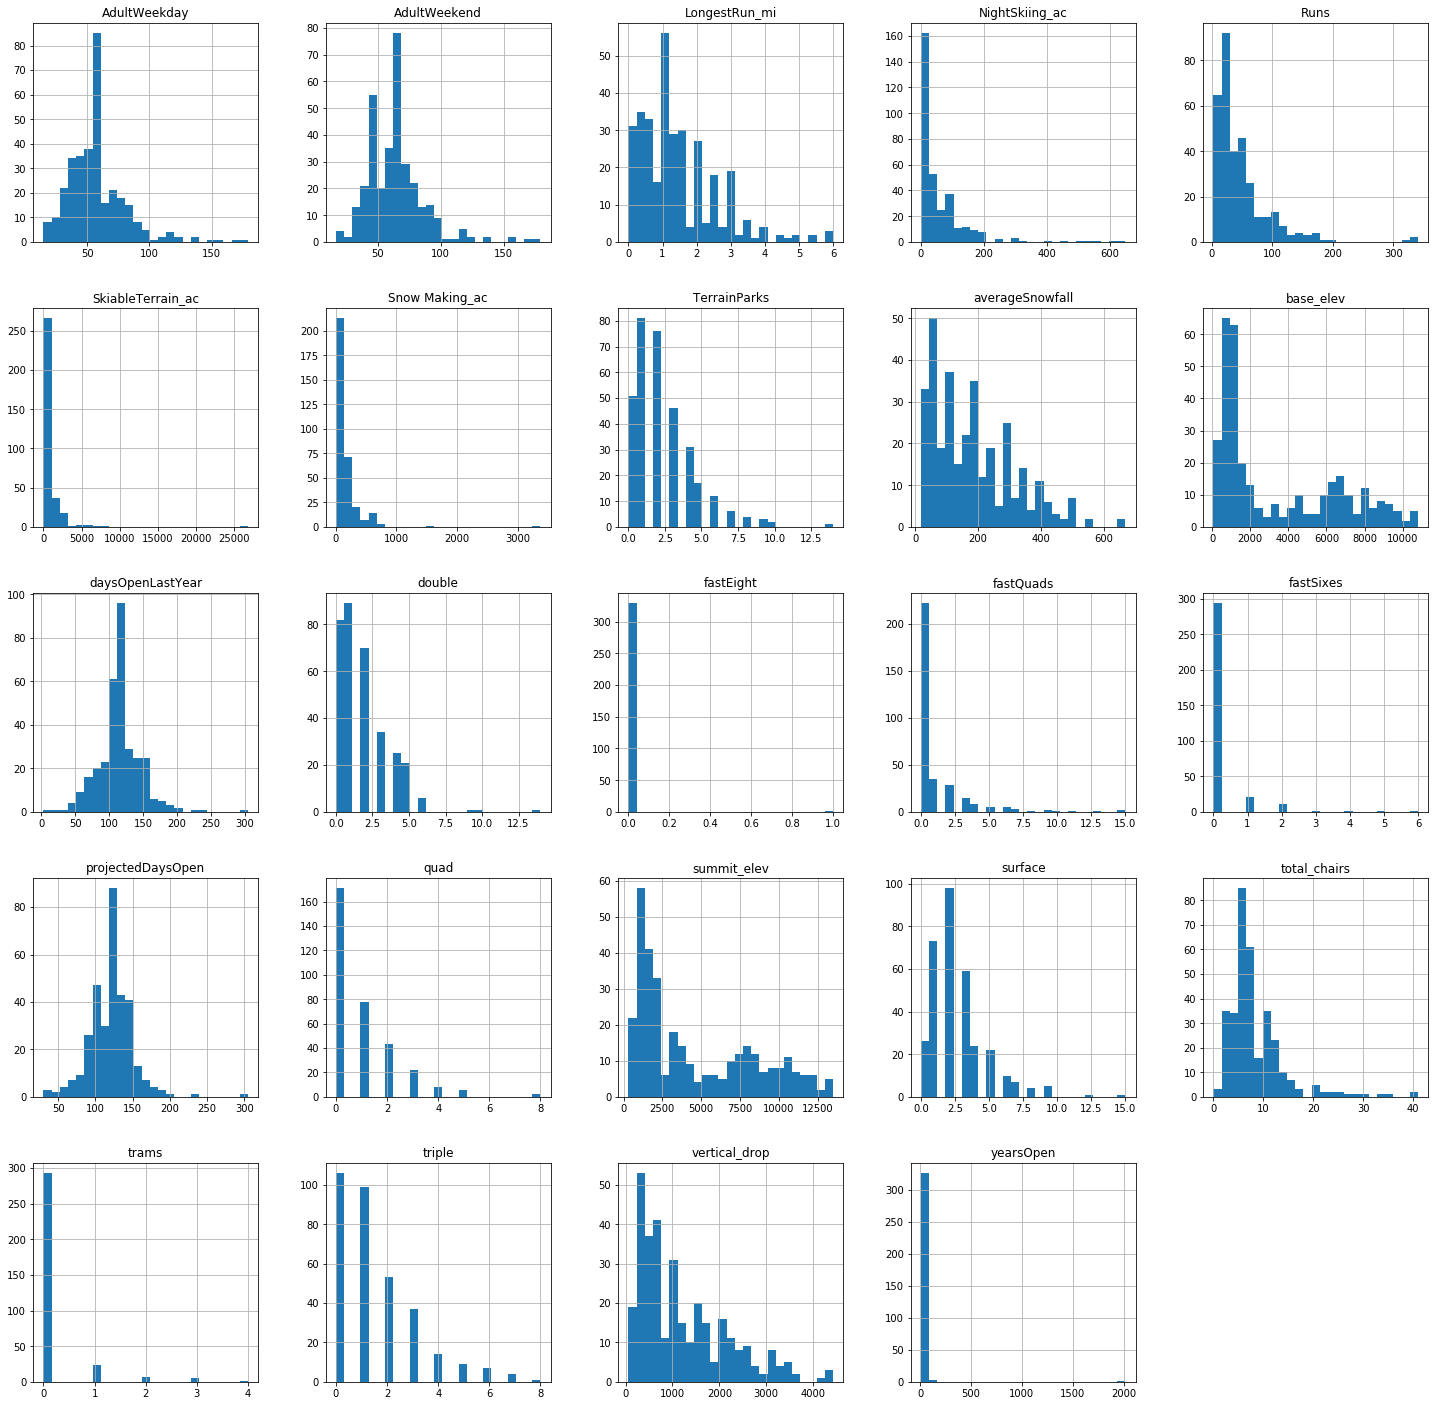

In [33]:
hist = df.hist(bins=25,figsize =(25,25))

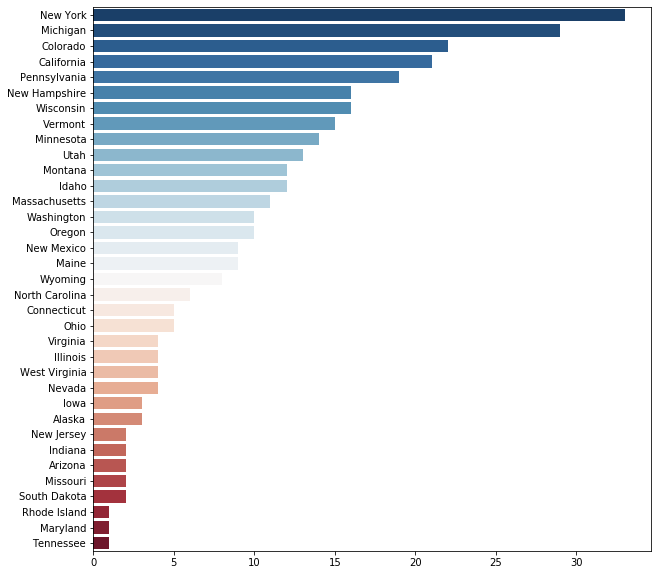

In [34]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.state.value_counts())
names = list(x.index)
values = list(x.state)
sns.barplot(x=values, y=names, palette="RdBu_r")

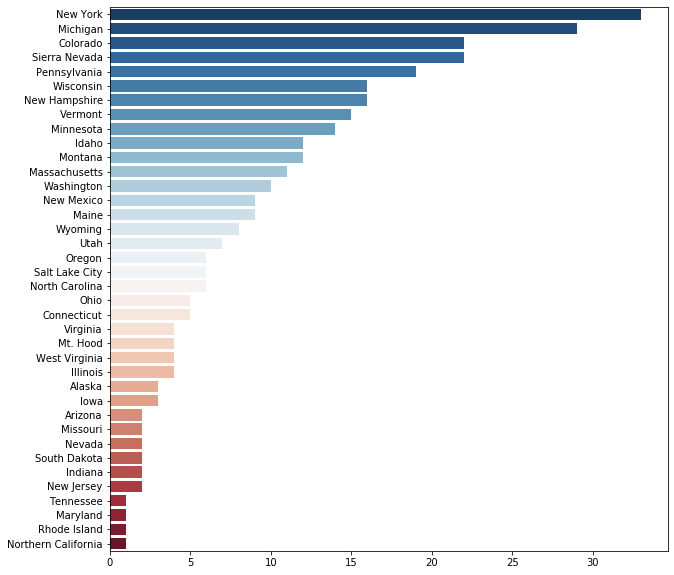

In [35]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.Region.value_counts())
names = list(x.index)
values = list(x.Region)
sns.barplot(x=values, y=names, palette="RdBu_r")

By reviewing the State and Regions plots, one notices that the Region feature is nearly identical to the state and therfore we can remove Region from the dataframe.

In [36]:
df=df.drop(['Region'],axis =1)
#del df['Region']

In [37]:
df.columns

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')

# Anamolies & Outliers - Review boxplots

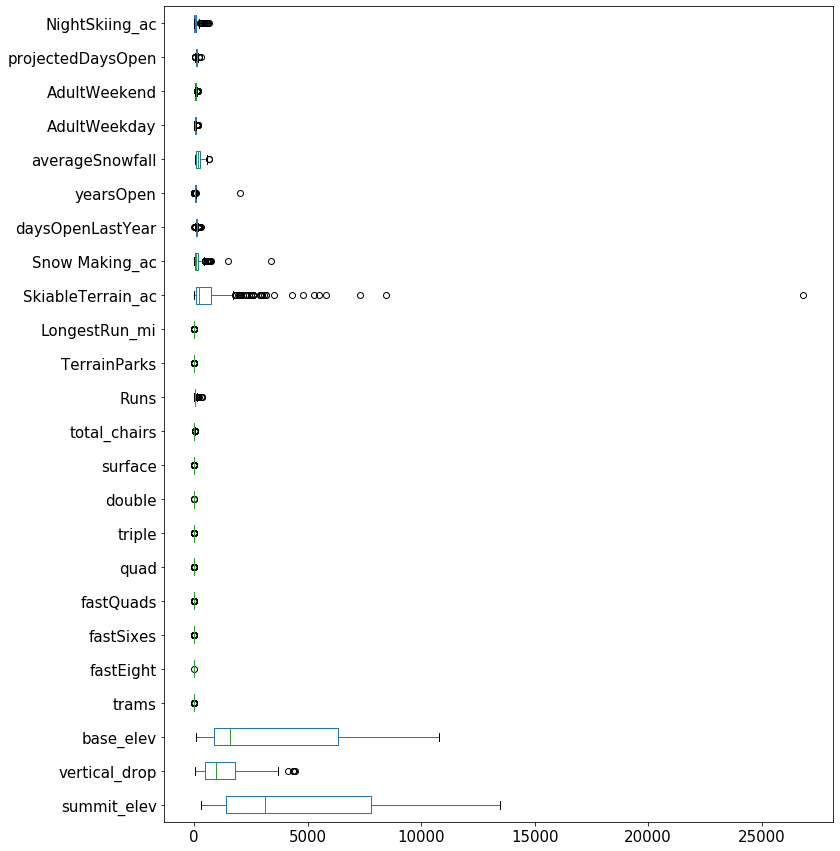

In [38]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

An outlier is an observation lying more than (1.5 * the Interquartile range) above the third quartile, or more than just that much below the first quartile. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure above describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

Apply outlier removal using the Interquartile range or replacement.

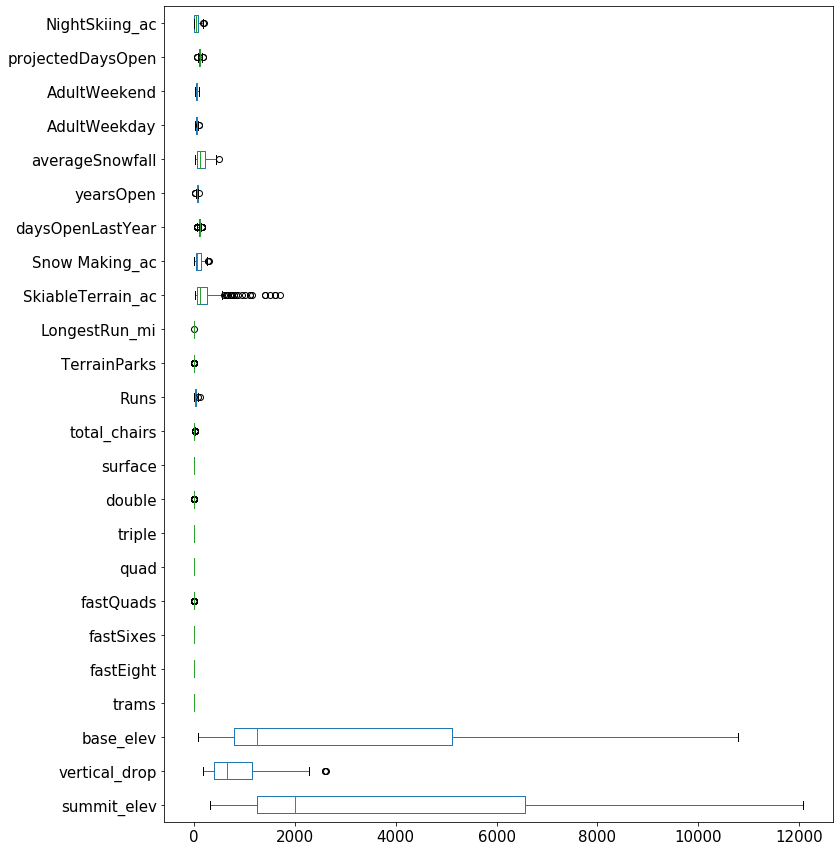

In [39]:
#Remove outliers based on IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
boxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [40]:
# Now lets compare our two dataframe after removing the outliers
print(df.shape)
print(dfno.shape)

(330, 26)
(176, 26)


Since Big Mountain Resort is face with increased operational cost as in the problem statement, I will focus on ways of increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, I will predict the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, I will predict the number of days the resort will be open each season.

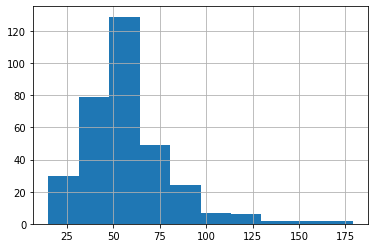

In [41]:
#Cost of adult weekday chairlift ticket
df['AdultWeekday'].hist()

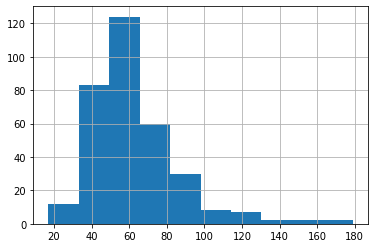

In [42]:
##Cost of adult weekend chairlift ticket
df['AdultWeekend'].hist()

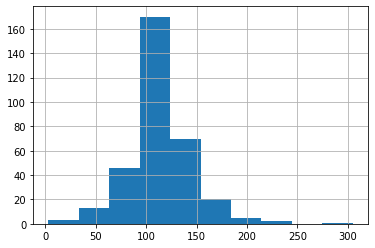

In [43]:
#Total number of days open last year
df['daysOpenLastYear'].hist()

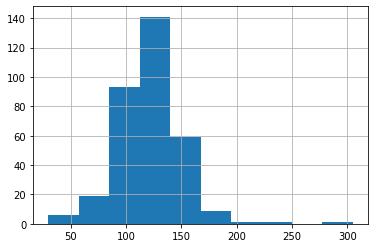

In [44]:
#Projected days open in the upcoming season
df['projectedDaysOpen'].hist()

# Exploring data relationships

<font color='teal'>**Creating pairplots or what is commonly referred to as biplots**</font>

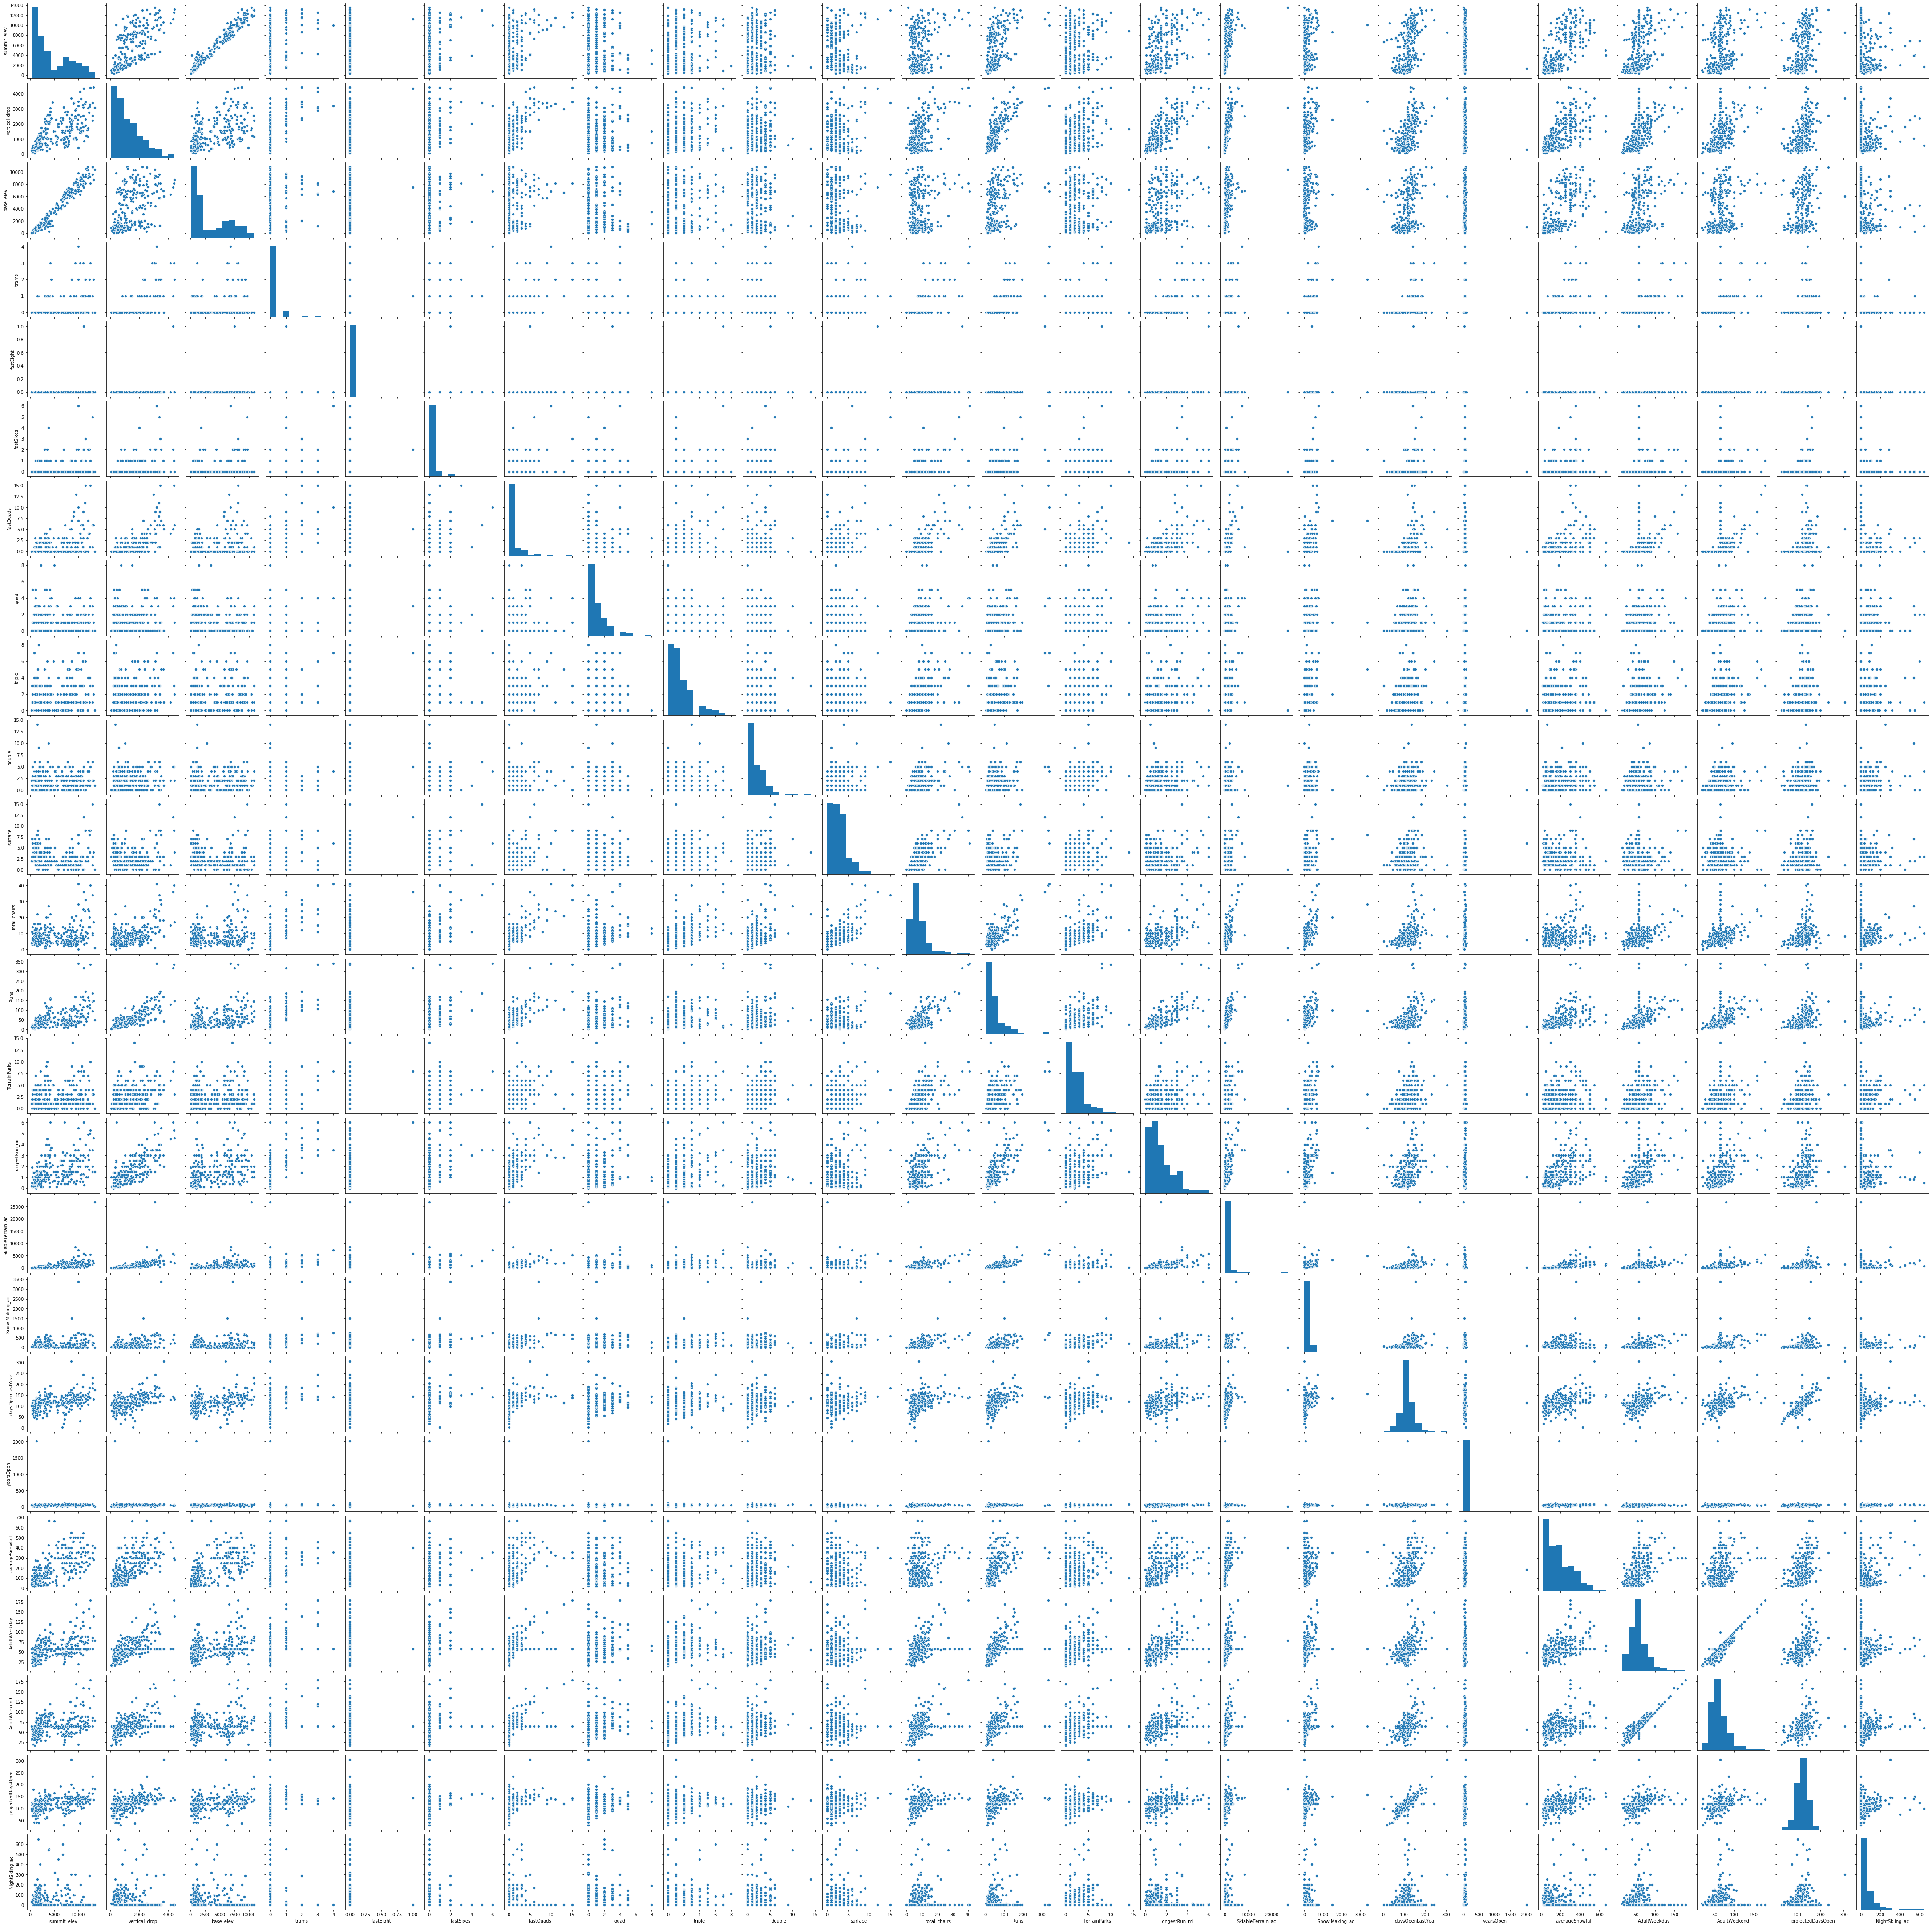

In [45]:
#pair plots
g = sns.pairplot(df)

# Identification and creation of features

In [46]:
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1.000000,0.740000,0.980000,0.340000,0.100000,0.260000,0.450000,-0.010000,0.180000,0.110000,-0.040000,0.300000,0.570000,0.160000,0.530000,0.470000,0.240000,0.430000,-0.020000,0.690000,0.470000,0.380000,0.400000,-0.160000
vertical_drop,0.740000,1.000000,0.590000,0.590000,0.180000,0.380000,0.680000,0.140000,0.260000,0.170000,0.090000,0.550000,0.800000,0.340000,0.760000,0.530000,0.430000,0.530000,-0.030000,0.660000,0.630000,0.580000,0.510000,-0.070000
base_elev,0.980000,0.590000,1.000000,0.230000,0.070000,0.210000,0.340000,-0.060000,0.150000,0.080000,-0.070000,0.200000,0.450000,0.100000,0.410000,0.410000,0.170000,0.360000,-0.020000,0.630000,0.380000,0.280000,0.330000,-0.180000
trams,0.340000,0.590000,0.230000,1.000000,0.080000,0.530000,0.660000,0.220000,0.270000,0.070000,0.270000,0.650000,0.690000,0.330000,0.570000,0.340000,0.550000,0.350000,-0.010000,0.290000,0.410000,0.410000,0.210000,-0.100000
fastEight,0.100000,0.180000,0.070000,0.080000,1.000000,0.150000,0.100000,0.090000,0.190000,0.100000,0.250000,0.260000,0.320000,0.150000,0.220000,0.150000,0.060000,0.050000,-0.010000,0.090000,0.000000,-0.000000,0.050000,-0.030000
fastSixes,0.260000,0.380000,0.210000,0.530000,0.150000,1.000000,0.440000,0.120000,0.270000,0.120000,0.370000,0.600000,0.550000,0.350000,0.370000,0.290000,0.430000,0.270000,-0.010000,0.180000,0.220000,0.230000,0.200000,-0.070000
fastQuads,0.450000,0.680000,0.340000,0.660000,0.100000,0.440000,1.000000,0.150000,0.300000,0.100000,0.330000,0.760000,0.750000,0.430000,0.580000,0.390000,0.520000,0.450000,-0.020000,0.400000,0.540000,0.530000,0.360000,-0.020000
quad,-0.010000,0.140000,-0.060000,0.220000,0.090000,0.120000,0.150000,1.000000,0.140000,-0.120000,0.120000,0.360000,0.300000,0.270000,0.200000,0.060000,0.220000,0.190000,-0.030000,0.070000,0.250000,0.300000,0.200000,0.160000
triple,0.180000,0.260000,0.150000,0.270000,0.190000,0.270000,0.300000,0.140000,1.000000,-0.020000,0.180000,0.540000,0.370000,0.400000,0.260000,0.140000,0.340000,0.190000,-0.040000,0.130000,0.270000,0.310000,0.160000,0.090000
double,0.110000,0.170000,0.080000,0.070000,0.100000,0.120000,0.100000,-0.120000,-0.020000,1.000000,0.090000,0.370000,0.240000,0.250000,0.150000,0.080000,0.100000,0.100000,-0.030000,0.090000,0.120000,0.120000,0.110000,0.130000


In [47]:
# Creating correlation matrix
corr_matrix = df.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Finding index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [48]:
print('Features selected to drop include',to_drop)

Features selected to drop include ['base_elev']


In [49]:
print('Reduced dataframe size ', df.drop(df[to_drop], axis=1).shape)

Reduced dataframe size  (330, 25)


Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps to determine the number of clusters to include in the kmeans clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four as below, therefore we set the parameter k = 3 in the next cells.

In [50]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis =1).values

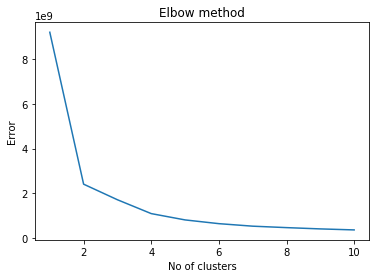

In [51]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

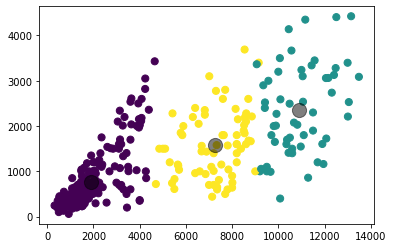

In [52]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<font color='teal'>**Adding the clusters the dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `newdata3_output.csv`.**</font>

In [53]:
df['clusters']=y_kmeans3

In [54]:
df.to_csv('data/newdata3_output.csv',index=False)

In [55]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 52EB-87F5

 Directory of C:\Users\13134\Documents\GitHub\Capstone-1\Capstone Project 1

06/02/2020  04:17 PM    <DIR>          .
06/02/2020  04:17 PM    <DIR>          ..
06/02/2020  10:13 AM    <DIR>          .ipynb_checkpoints
06/02/2020  04:17 PM         3,424,761 Capstone Project 1.ipynb
06/02/2020  04:18 PM    <DIR>          data
06/02/2020  03:41 PM    <DIR>          figures
06/02/2020  03:41 PM    <DIR>          models
               1 File(s)      3,424,761 bytes
               6 Dir(s)  869,025,161,216 bytes free


# Step 4. Pre-processing and Training Data Development

In [56]:
#Loading newdata3
file_name ="data/newdata3_output.csv"
df=pd.read_csv(file_name)
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


# Creating dummy features for categorical variables

In [57]:
df = pd.concat([df, pd.get_dummies(df['state'])], axis=1).drop(['state'], axis =1)
print(df.shape)
df.head()

(330, 61)


,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,9200,0,0.0,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.columns

Index(['Name', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'clusters', 'Alaska', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

# Standardize the magnitude of numeric features

In [59]:
#scale data
from sklearn import preprocessing
X=df.drop(['Name','AdultWeekend'], axis=1)
y=df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)

# Split into training and testing datasets

Creating a 75/25 (train/test) split with the y = AdultWeekend. Since I want to predict the price increase, I will start by using the adult weekend ticket price as my response variable for modeling.

In [60]:
from sklearn.model_selection import train_test_split
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [61]:
print(X.shape)
print(y.shape)

(330, 59)
(330,)


# Step 5. Modeling

# Model 1

# Fit Models with Training Data Set

In [62]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [63]:
y_pred = model.predict(X_test)

Review Model Outcomes

In [64]:
explained_variance_score(y_test, y_pred)

0.9307311170659226

In [65]:
mean_absolute_error(y_test, y_pred)

5.158462408219016

In [66]:
lm.intercept_

64.11774854252869

The intercept above is the mean AdultWeekend price for all the resorts given the other characteristics.

We can compare each of the coeeficients for the features to determine the features importance. The next cell prints out the coefficient values from the linear model and sort them in descending order to identify the top ten most important features.

In [67]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
total_chairs,1.598024e+13
fastQuads,6.058145e+12
surface,5.676027e+12
double,5.001926e+12
triple,4.462061e+12
New York,4.238695e+12
Michigan,4.000177e+12
quad,3.616336e+12
Colorado,3.524387e+12
California,3.448941e+12


Given that we care more about actionable traits associated with the ticket pricing, I rebuild the model without the state features and compared the results.

# Model 2

In [68]:
file="data/newdata3_output.csv"
df=pd.read_csv(file)

X=df.drop(['AdultWeekend','Name','state'], axis=1)
y=df.AdultWeekend

scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(lm.intercept_)

0.9236919464675655
5.523311392028642
64.08978920438395


In [69]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
AdultWeekday,19.905211
summit_elev,13.343899
base_elev,11.308485
vertical_drop,4.960449
Runs,1.638451
quad,1.535132
averageSnowfall,1.437384
triple,1.413027
clusters,1.370397
surface,1.330237


**<font color='teal'> When reviewing the model 2 coefficients, we see `summit_elev` is now in the top two spot. This is also difficult to change from a management prespective and also it is highly correlated with `base_elev` and `vertical_drop`.  Therefore, I rebuild a third model without the state features and without the `summit_elev` and without `base_elev`and then compare the results. </font>**

# Model 3

In [70]:
file="data/newdata3_output.csv"
df=pd.read_csv(file)

X=df.drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1)
y=df.AdultWeekend

scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(lm.intercept_)

0.9300201909487673
5.326933856028317
64.09102085060063


In [71]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
AdultWeekday,19.888960
vertical_drop,1.757076
Runs,1.726995
quad,1.488422
triple,1.397389
averageSnowfall,1.394702
clusters,1.316145
surface,1.270270
daysOpenLastYear,0.936669
fastQuads,0.765782


# Identifying the best model

**<font color='teal'> I reviewed the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices.</font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0.93 | 5.16 |-|
| Model 2. | 0.92| 5.52|'state'|
| Model 3. | 0.93 | 5.33 |'state','summit_elev','base_elev'|

# Model Selection:

Model 3 is the best model as it has the highest Explain Variance Score/R-squared and lowest Mean Absolute Error(MAE)

# Step 6. Documentation

# Fitting the best model (Model 3)

In [72]:
file="data/newdata3_output.csv"
df=pd.read_csv(file)

X=df.drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1)
y=df.AdultWeekend

scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(lm.intercept_)

0.9300201909487673
5.326933856028317
64.09102085060063


# Review the results

In [73]:
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,6817,2353,4464,0,0.0,0,3,2,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


In [74]:
BM_scaled=scaler.transform(df[df['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1))

Below is the expected price to present to Big Mountain Reseort management. This is based on model 3 given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [75]:
BM_pred = model.predict(BM_scaled)
print ("The expected Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, BM_pred)))

The expected Big Mountain Resort adult weekend price is $88.50694289292252 


In [76]:
ac = df[df['Name'].str.contains('Big Mountain')]
print ("The actual Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, ac.AdultWeekend)))

The actual Big Mountain Resort adult weekend price is $81.0 


We can use the clusters we added to the data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics.

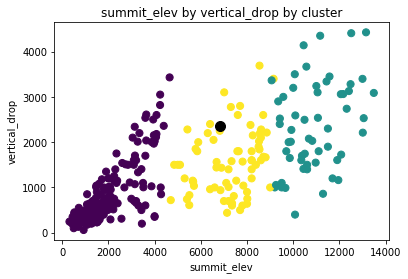

In [77]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

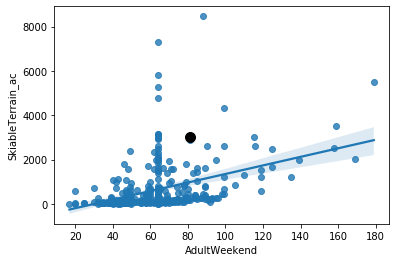

In [78]:
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=df[(df['SkiableTerrain_ac']<25000)])
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=ac, c='black',s=100)
plt.savefig('figures/fig2.png',bbox_inches='tight')

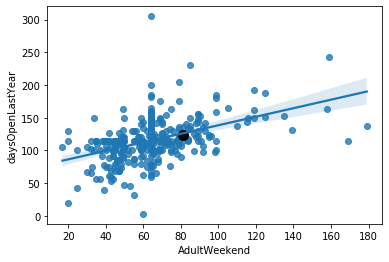

In [79]:
sns.regplot(x="AdultWeekend", y="daysOpenLastYear", data=df)
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=ac, c='black',s=100)
plt.savefig('figures/fig3.png',bbox_inches='tight')

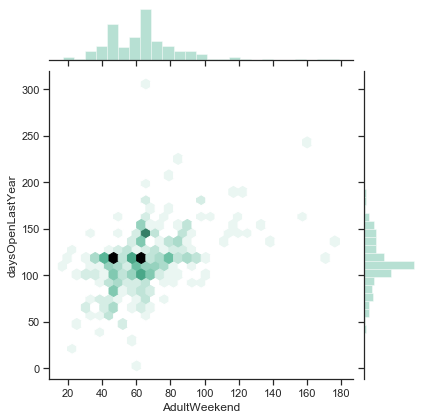

In [80]:
sns.set(style="ticks")
sns.jointplot(x=df['AdultWeekend'], y=df['daysOpenLastYear'], kind="hex", color="#4CB391")
plt.savefig('figures/fig4.png',bbox_inches='tight')

# Finalize Code

Saving up the codes in the models folder I created from the beginning of the project

In [81]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib')

['models/regression_model_adultweekend.joblib']

# Finalize Documentation

Saving the model performance metrics as `model_metrics.csv` in the models folder I created from the beginning

In [82]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('models/model_metrics.csv',index=False)

In [83]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 52EB-87F5

 Directory of C:\Users\13134\Documents\GitHub\Capstone-1\Capstone Project 1

06/02/2020  04:57 PM    <DIR>          .
06/02/2020  04:57 PM    <DIR>          ..
06/02/2020  10:13 AM    <DIR>          .ipynb_checkpoints
06/02/2020  04:57 PM         3,626,650 Capstone Project 1.ipynb
06/02/2020  04:18 PM    <DIR>          data
06/02/2020  04:49 PM    <DIR>          figures
06/02/2020  04:58 PM    <DIR>          models
               1 File(s)      3,626,650 bytes
               6 Dir(s)  869,023,186,944 bytes free
